In [20]:
# add parent dir to sys.path so we can import from repo base
import os; import sys; sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

from tsfresh.transformers import RelevantFeatureAugmenter

from script.dataset import get_data
from script.visualization import report_cm

In [24]:
# Parameters
leave_out = 'p1'
k_folds = 5
random_state = 42

In [26]:
# Load data
ts, y = get_data(simplify=False)

# Prepare the DataFrame
X = pd.DataFrame(index=y.index)
split = y.index.str.contains(leave_out)
X_train_full, X_test, y_train_full, y_test = (X[~split], X[split], y[~split], y[split])

In [28]:
# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)
best_model = None
best_score = 0

In [30]:
# Initialize lists for performance metrics
rf_accuracies = []
rf_recalls = []
rf_fscores = []

def test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    fscore = f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, fscore


# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_full)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # Split the data
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    # Define pipeline
    ppl = Pipeline([
        ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='time')),
        ('classifier', RandomForestClassifier(random_state=random_state))
    ])
    ppl.set_params(augmenter__timeseries_container=ts)

    # Train model
    ppl.fit(X_train, y_train)
    
    # Validate model
    y_val_pred = ppl.predict(X_val)
    val_score = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy: {val_score:.4f}')
    
    # Save the best model
    if val_score > best_score:
        best_score = val_score
        best_model = ppl
    
    # Test the model using X_test and y_test, assumed to be defined outside of the loop
    test_accuracy, test_recall, test_fscore = test(ppl, X_test, y_test)
    rf_accuracies.append(test_accuracy)
    rf_recalls.append(test_recall)
    rf_fscores.append(test_fscore)
    

# Create a DataFrame for RF Test-Performance-Per-Fold
performance_data = {
    "K-Fold": list(range(1, k_folds + 1)),
    "RF_Accuracy": rf_accuracies,
    "RF_Recall": rf_recalls,
    "RF_FScore": rf_fscores
}
df = pd.DataFrame(performance_data)

# Save to CSV in the current working directory
csv_path = os.path.join(os.getcwd(), 'rf_test_performance_per_fold.csv')
df.to_csv(csv_path, index=False)
print(f'Results saved to {csv_path}')


Fold 1/5


Feature Extraction: 100%|███████████████████████| 20/20 [00:31<00:00,  1.60s/it]
/opt/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 

Validation Accuracy: 0.7447


Feature Extraction: 100%|███████████████████████| 20/20 [00:06<00:00,  3.27it/s]


Fold 2/5


Feature Extraction: 100%|███████████████████████| 20/20 [00:36<00:00,  1.81s/it]
/opt/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_4_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_5_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_6_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__thre

Validation Accuracy: 0.7447


Feature Extraction: 100%|███████████████████████| 20/20 [00:07<00:00,  2.81it/s]


Fold 3/5


Feature Extraction: 100%|███████████████████████| 20/20 [00:38<00:00,  1.93s/it]
/opt/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 

Validation Accuracy: 0.8913


Feature Extraction: 100%|███████████████████████| 20/20 [00:06<00:00,  2.90it/s]


Fold 4/5


Feature Extraction: 100%|███████████████████████| 20/20 [00:36<00:00,  1.84s/it]
/opt/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 

Validation Accuracy: 0.8043


Feature Extraction: 100%|███████████████████████| 20/20 [00:07<00:00,  2.70it/s]


Fold 5/5


Feature Extraction: 100%|███████████████████████| 20/20 [00:41<00:00,  2.05s/it]
/opt/anaconda3/lib/python3.11/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['EMG_7_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_0__query_similarity_count__query_None__threshold_0.0'
 'EMG_1__query_similarity_count__query_None__threshold_0.0'
 'EMG_2__query_similarity_count__query_None__threshold_0.0'
 'EMG_3__query_similarity_count__query_None__threshold_0.0'
 'EMG_4__query_similarity_count__query_None__threshold_0.0'
 'EMG_5__query_similarity_count__query_None__threshold_0.0'
 'EMG_6__query_similarity_count__query_None__threshold_0.0'
 'EMG_7__query_similarity_count__query_None__threshold_0.0'
 'EMG_0_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_1_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_2_cal__query_similarity_count__query_None__threshold_0.0'
 'EMG_3_cal__query_similarity_count__query_None__threshold_0.0'
 

Validation Accuracy: 0.7826


Feature Extraction: 100%|███████████████████████| 20/20 [00:07<00:00,  2.81it/s]


Results saved to /Users/gregorlederer/Documents/Coding/HPI_Data_Science_for_Wearables/hpi-ds4w/models/rf_test_performance_per_fold.csv


In [32]:
# Save to CSV in the current working directory
csv_path = 'rf_test_performance_per_fold.csv'
df.to_csv(csv_path, index=False)
print(f'Results saved to {csv_path}')

Results saved to rf_test_performance_per_fold.csv


Best Validation Accuracy: 0.9565


Feature Extraction: 100%|███████████████████████| 20/20 [00:05<00:00,  3.95it/s]


# Results: p1

accuracy: 0.9375


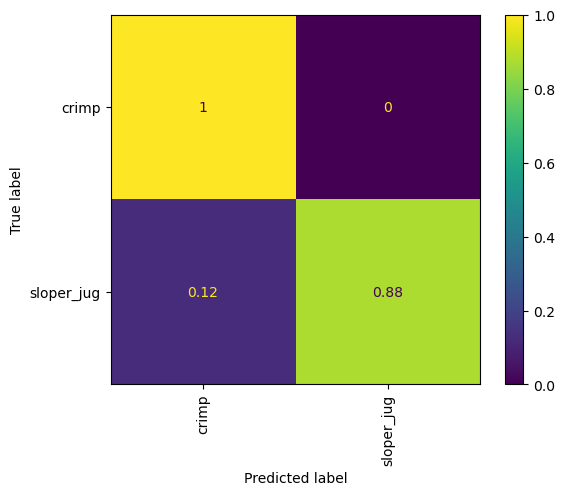

              precision    recall  f1-score   support

       crimp       0.89      1.00      0.94        40
  sloper_jug       1.00      0.88      0.93        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



In [18]:
# Final evaluation on the test set
print(f'Best Validation Accuracy: {best_score:.4f}')
y_test_pred = best_model.predict(X_test)
report_cm(f'Results: {leave_out}', y_test, y_test_pred, best_model.named_steps['classifier'].classes_)
print(classification_report(y_test, y_test_pred))